# Laboratorium 6 - Regresja Liniowa

Celem laboratorium jest praktyczna implementacja i wykorzystanie regresji liniowej. Zakładam, że zagadnienia teoretyczne związane z regresją liniową są znane z wykładu, bądź z podstaw matematyki. Jeżeli nie - wiedzę należy nadrobić we własnym zakresie. Uuuuuuu groźny nauczyciel here

Zacznijmy od importu bibliotek i wygenerowania przykładowych danych.ych.

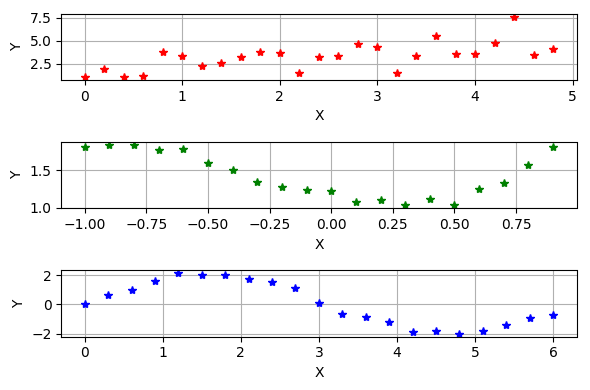

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

np.random.seed(12345)


# Funkcja liniowa + szum
x1 = np.arange(0, 5, 0.2)
a = 0.7
b = 1.3
y1 = a*x1 + b + np.random.randn(x1.size)

# Wielomian + szum
x2 = np.arange(-1, 1, 0.1)
a3 = 0.9
a2 = 0.8
a1 = -0.7
a0 = 1.2
y2 = a3*x2**3 + a2*x2**2 + a1*x2**1 + a0*x2**0 + np.random.randn(x2.size)*0.05

# Sinus + szum
x3 = np.arange(0, 2*np.pi, 0.3)
y3 = 2*np.sin(x3) + np.random.randn(x3.size)*0.2

# Wizualizacja
plt.figure(dpi=100)
plt.subplot(3, 1, 1)
plt.plot(x1, y1, "r*")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.subplot(3, 1, 2)
plt.plot(x2, y2, "g*")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.subplot(3, 1, 3)
plt.plot(x3, y3, "b*")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.tight_layout()

Następnie wykorzystaj gotową funkcję w bibliotece sklearn do regresji liniowej i wyznacz wcześniej zadane parametry modelu oraz dokonaj wizualizacji podobnej do wizualizacji poniżej. 

Linear function coefficients:  [0.65916353167775, 1.7119047927184097]
Polynomial coefficients:  [0.848891141711204, 0.8198749499646582, -0.7046315242331508, 1.1604636085156463]
Sine coefficients:  [2.02500435]


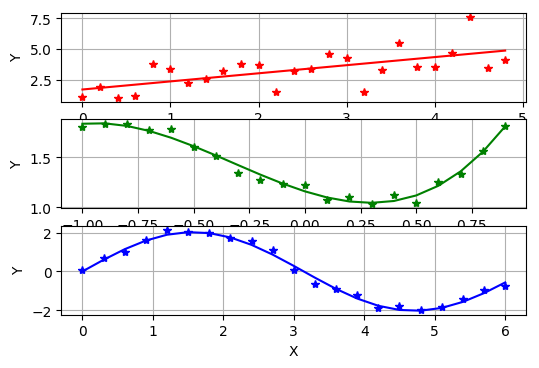

In [3]:
# TO DO
# Przykładowy rezultat:

#### i cyk regresja liniowa byle jak 

In [5]:
# sprawdźmy sobie co mamy w przygotowanych danych? 
print(f'Oś odciętych: {x1}')
print(f'Oś rzędnych: {y1}')

Oś odciętych: [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8]
Oś rzędnych: [1.09529234 1.91894334 1.06056128 1.1642697  3.82578057 3.39340583
 2.23290788 2.56174615 3.18902257 3.80643474 3.70718936 1.54377889
 3.25499163 3.34891288 4.61291684 4.28642934 1.53836269 3.30815746
 5.48902531 3.52143026 3.56025855 4.71698501 7.62894392 3.49877248
 4.0829127 ]


Są jakieś punkty - good enough, wyświetlmy je: 

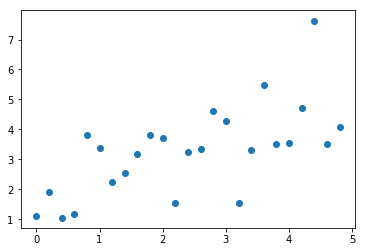

In [6]:
plt.figure()
plt.scatter(x1, y1)

coś mi mówi, że można między nimi przeprowadzić jakąś kreskę. Spróbujmy

In [4]:
# musimy transponować dane 
x1_t = x1.reshape(-1, 1)
y1_t = y1.reshape(-1, 1)

# tworzymy nowy obiekt klasy LinearRegression, czyli przygotowujemy nową regresje, na której mozemy dokonywać operacji 
lr1 = lm.LinearRegression() 

# dopasowujemy sobie funkcję jąrda do zadanych punktów - metoda fit; mówimy naszej nowej regresji - ziomie weź te punkty i spróbuj się dopasować
lr1.fit(x1_t, y1_t)   

LinearRegression()

Wyświetlmy współczynniki takiej funkcji, w przypadku zwykłej regresji liniowej jest to po prostu a i b (y = ax + b) 

In [8]:
print(lr1.coef_) # a 
print(lr1.intercept_) # b 

[[0.65916353]]
[1.71190479]


Sprawdźmy jakie y znajdzie nasza nowa funkcja dla znanych x - metoda predykcji (przewidywania)

In [9]:
y1_pred = lr1.predict(x1_t)
print(y1_pred)

[[1.71190479]
 [1.8437375 ]
 [1.97557021]
 [2.10740291]
 [2.23923562]
 [2.37106832]
 [2.50290103]
 [2.63473374]
 [2.76656644]
 [2.89839915]
 [3.03023186]
 [3.16206456]
 [3.29389727]
 [3.42572998]
 [3.55756268]
 [3.68939539]
 [3.82122809]
 [3.9530608 ]
 [4.08489351]
 [4.21672621]
 [4.34855892]
 [4.48039163]
 [4.61222433]
 [4.74405704]
 [4.87588974]]


Narysujmy sobie dopasowaną prostą 

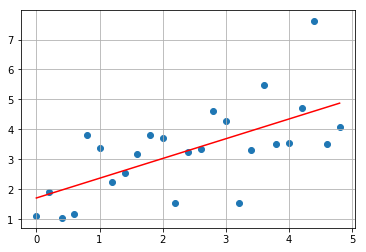

In [10]:
plt.figure()
plt.scatter(x1, y1)
plt.plot(x1, y1_pred, color='red')
plt.grid()

#### drugi przykład trochę szybciej? 

No jakby nie do końca, bo jak niby mam linię prostą dopasować do coś co mniej więcej przypomnia sinusa?! No IMO to jest tak, że ktoś zapomniał napisać przy okazji "ziomy, spoko, dopasujecie sobie regresją liniową funkcję do tych punktów, ale trzeba zaimportować inny moduł i trochę dane przekształcić". 

In [97]:
from sklearn.preprocessing import PolynomialFeatures

In [98]:
x2_t = x2.reshape(-1, 1)
y2_t = y2.reshape(-1, 1)

In [99]:
# teraz sobie stworzymy przedmiot, który wylicza nam nieliniowe "cechy"; więcej tutaj -> https://scikit-learn.org/stable/modules/preprocessing.html#generating-polynomial-features
# mniej więcej przypomina to sinusa, może parabolę, na start weźmiemy sobie wielomian drugiego rzędu (skończyło się na 3)
polynomial_features= PolynomialFeatures(degree=3) 
x_poly = polynomial_features.fit_transform(x2_t) 
# ogólnie zachęcam sobie pozmieniać ten parameter "degree" i pooglądać jak zmienia się poniższa funkcja i współczynniki

In [14]:
lr2 = lm.LinearRegression() 
lr2.fit(x_poly, y2_t)
# konkatenuje (łączę) sobie odpowiednie elementy tablic, żeby ładnie wyglądały
print(f'Polynomial coefficients {np.concatenate([lr2.coef_[0][1::], lr2.intercept_])}') 

Polynomial coefficients [-0.70463152  0.81987495  0.84889114  1.16046361]


In [15]:
y2_pred = lr2.predict(x_poly)

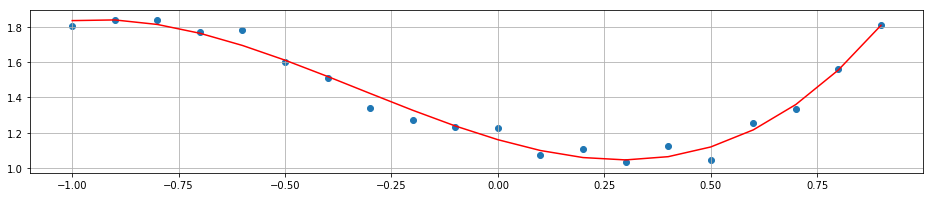

In [16]:
plt.figure(figsize=(16, 3)) # musiałem zmienić rozmiar figury (parametr figsize), żeby jako tako to wyglądało
plt.scatter(x2, y2)
plt.plot(x2, y2_pred, color='red')
plt.grid()

Dlaczego się różnią? Co się stanie jeżeli zwiększymy liczbę punktów? Co się stanie jeżeli usuniemy szum? Skąd nazwa "regresja liniowa" skoro wykorzystujemy dowolne funkcje nieliniowe?
Powyższe zagadnienie może się przydać do sprawozdań na kolejnych przedmiotach, gdzie będzie trzeba "dofitować" zadaną (znaną) funkcję do otrzymanych danych (na np. metrologii, biopomiarach, biofizyce).

- W jakim sensie się różnią? nie do końca rozumiem pytanie, jeśli chodzi o to, że np. w pierwszym przykładzie (y = ax + b) a równało się 0.7 a po "matematyce" wychodzi 0.6, to dlatego, że mieliśmy szum, który zmienił nachylenie prostej
- Zależy jakich punktów, jeśli zwiększymy liczbę szumu to dopasowanie do będzie gorsze, jeśli zwiększymy liczbę poprawnych punktów, to zniwelujemy wpływ szumu i będziemy mieć lepsze dopasowanie
- Jeśli usuniemy szum, to dopasowanie będzie dokładniejsze a regresja będzie lepiej odwzorowywać zjawisko
- Bo wykorzytujemy kombinacje linowe (patrz. algebra)

W kolejnym kroku zaimplementuj regresją liniową samodzielnie na dwa sposoby: korzystając z metody spadku gradientowego (w wersji uproszczonej, kończącą obliczenia po z góry zdefiniowanej liczbie iteracji) oraz w wersji opartej o obliczenia macierzowe (dla dowolnej kombinacji liniowej, działanie analogicznie do wcześniej wykorzystaniej funkcji z biblioteki sklearn).


In [123]:
def our_linear_regression_iterative(X, y, learning_rate=0.01, num_iters=1000):
    """
    X - macierz próbek/cech
    y - wektor przyjmowanych wartości    
    """
    # nie mam czasu tego pisać 
    # patrz -> https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#gradient-descent
    # ogólnie proces jest taki, że jak mamy równanie y_red = ax + (a1x1) + (a2x2) + b, to sobie robimy tablicę wartości 
    # dla wszystkich a (tą tablicę często nazywa się theta) oraz pojedyncze b (bias)
    # potem liczymy sobie y_pred
    # liczymy błąd pomiędzy y i y_pred
    # na jego podstawie robimy sobie różniczę dla macierzy theta oraz wartości b (tzw. gradient theta oraz gradient b)
    # aktualizujemy sobie wagi
    # elo
    pass

In [103]:
def our_linear_regression_matrix(X, y):
    """
    X - macierz próbek/cech
    y - wektor przyjmowanych wartości
    """
    if len(X.shape) == 1: 
        X = X.reshape(-1, 1)
    
    if X.shape[1] < 2:
        X = np.hstack([np.ones((len(X),1)), X]) # dla danych dwuwymiarowych (czyli pojedyncze X, czyli zwykłe pary x, y) 
                                                # musimy dodać jedną kolumnę, że otrzymać drugi współczynnik (intercept - punkt przecięcia z Y)
    
    coef = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
    return coef
    
    

In [104]:
x = our_linear_regression_matrix(x_poly, y2_t)
print(x)

[[ 1.16046361]
 [-0.70463152]
 [ 0.81987495]
 [ 0.84889114]]


Przykładowy rezultat:

Coefficients from our_linear_regiression_iterative for linear:  [1.71190479 0.65916353]
Coefficients from our_linear_regiression_matrix for linear:  [1.71190479 0.65916353]

Coefficients from our_linear_regiression_iterative for polynomial:  [ 1.16145922 -0.68896953  0.81549464  0.82347731]
Coefficients from our_linear_regiression_matrix for polynomial:  [ 1.16046361 -0.70463152  0.81987495  0.84889114]

Coefficients from our_linear_regiression_iterative for sine:  [2.02498015]
Coefficients from our_linear_regiression_matrix for sine:  [2.02498015]


Jakie są wady i zalety obu z powyższych implementacji? Do jakiego typu problemów może być lepsza metoda oparta o spadek gradientowy, a do jakich metoda oparta o bezpośrednie przekształcenia macierzowe? Zapoznaj się z podstawowymi sposobami oceny poprawności wyznaczonego modelu i spróbuj dokonać oceny wyznaczonych parametrów.

- Nie wiem xD nie uzywa się iteracyjnej, bo jest wolna i chujowa? ale no plusem jest na pewno to, że możemy sobie sterować "stopniem dopasowania" przez ilość iteracji. Dunno, nie wiem co autor miał na myśli 
- to na pewno metoda najmniejszych kwadratów (RMSE/MSE - jeden bierze pierwiastek, drugi nie), MAE, MAPE

Regresja liniowa jest najbardziej podstawową metodą wykorzystwaną do problemów regresji. Niemniej jednak, jest to metoda raczej historyczna, która nie znajduje zastosowania dla większości rzeczywistych, wielowymiarowych problemów, gdzie state-of-the-art oparty jest o metody uczenia głębokiego: https://arxiv.org/pdf/1803.08450.pdf